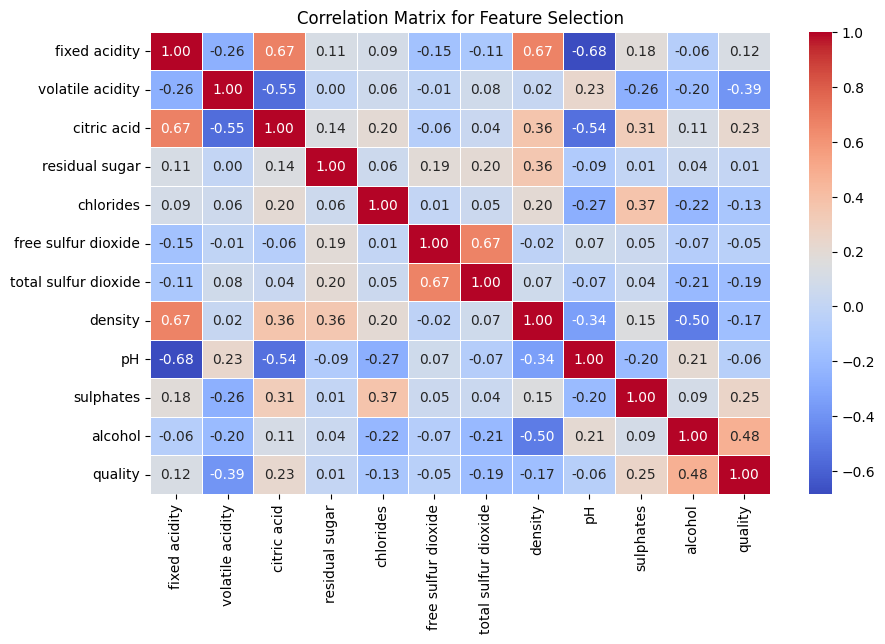

Highly Correlated Feature Pairs (correlation > 0.8):
('fixed acidity', 'fixed acidity')
('volatile acidity', 'volatile acidity')
('citric acid', 'citric acid')
('residual sugar', 'residual sugar')
('chlorides', 'chlorides')
('free sulfur dioxide', 'free sulfur dioxide')
('total sulfur dioxide', 'total sulfur dioxide')
('density', 'density')
('pH', 'pH')
('sulphates', 'sulphates')
('alcohol', 'alcohol')
('quality', 'quality')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file into a DataFrame named 'df'
df = pd.read_csv('/content/winequality-red.csv')

# ================================
# Step 1: Remove non-numeric columns (like 'quality_cat') for correlation matrix
# ================================
df_numeric = df.select_dtypes(include=[np.number])  # Only keep numeric columns

# Generate the correlation matrix for numeric features
corr = df_numeric.corr()

# Plot the Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Feature Selection")
plt.show()

# ================================
# Step 2: Identify Highly Correlated Features
# ================================
# Find the highly correlated features (correlation greater than 0.8)
highly_corr = corr[corr > 0.8].stack().index.tolist()

# Exclude self-correlations and duplicate pairs
highly_corr_filtered = [(col1, col2) for col1, col2 in highly_corr if col1 != col2]

# Print highly correlated feature pairs
print("Highly Correlated Feature Pairs (correlation > 0.8):")
for pair in highly_corr_filtered:
    print(pair)

In [5]:

# Show all columns in the dataset
print("Columns in the dataset:")
print(list(df.columns))


Columns in the dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
# Drop the 'free sulfur dioxide' column
df_cleaned = df.drop(columns=['free sulfur dioxide'])

# Show the columns of the cleaned dataset
print("Columns in the dataset after dropping 'free sulfur dioxide':")
print(list(df_cleaned.columns))

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())

Columns in the dataset after dropping 'free sulfur dioxide':
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First few rows of the cleaned dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   total sulfur dioxide  density    pH  sulphates  alcohol  quality  
0                  34.0   0.9978  3.51       0.56      9.4        5  
1                  67.0   0.9968  3.20       0.68      9.8        5  
2                  54.0   0.9970  3.26       0.65      9.8  